# **Import Library**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Loading**

In [ ]:
df=pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# **Exploratory Data Analysis (EDA)**

## Deskripsi Variabel dan Menangani Missing Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

Kode ini membantu kita memahami struktur awal dataset, termasuk tipe data (numerik/kategorikal) dan mengecek apakah ada kolom yang mengandung nilai kosong (null).

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


Baris ini menampilkan total nilai kosong pada setiap kolom. Ini penting untuk menentukan apakah perlu menangani missing value.

In [ ]:
df.dropna(axis=1, inplace=True)
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


Menghapus kolom yang memiliki nilai kosong karena diasumsikan jumlah missing-nya signifikan atau tidak penting bagi model.

Memastikan bahwa dataset sudah bersih dari nilai kosong setelah pembersihan.

In [ ]:
df.drop_duplicates(inplace=True)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Public,Positive,3,No,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Public,Negative,4,No,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Public,Neutral,4,No,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Public,Negative,4,No,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,Public,Neutral,4,No,Female,70


Duplikasi data bisa mengganggu distribusi dan hasil model. Baris ini membersihkan baris yang kembar identik.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


Fungsi ini memberi ringkasan statistik untuk membantu kita mengenal distribusi dan skala dari tiap fitur numerik.


In [ ]:
for col in df:
    print(df[col].value_counts())
    print('----------------------------')

Hours_Studied
20    465
19    441
21    431
23    411
22    402
18    401
17    381
24    357
16    351
15    315
25    289
14    269
26    263
27    229
13    218
12    192
28    171
11    146
29    134
30    123
10     94
9      86
31     77
8      58
32     54
7      51
33     40
34     29
5      21
35     20
4      17
6      17
3      12
36     11
38      7
39      7
2       6
37      6
1       3
43      1
44      1
Name: count, dtype: int64
----------------------------
Attendance
67     190
98     187
76     185
77     184
64     182
94     180
91     175
84     175
79     175
82     173
69     170
68     170
80     169
96     168
73     168
81     168
93     167
72     167
74     165
78     165
61     164
95     163
71     162
89     162
97     161
70     161
65     158
83     157
90     156
63     155
88     155
92     154
99     154
62     152
87     151
86     151
75     149
85     146
66     145
60      87
100     81
Name: count, dtype: int64
----------------------------
Pare

Loop ini mencetak frekuensi kemunculan nilai unik dalam setiap kolom. Sangat berguna untuk memahami persebaran data kategorikal dan outlier potensial.



# **Data Preparation**

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Menghapus outlier menggunakan metode IQR
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        before = df_cleaned.shape[0]
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
        after = df_cleaned.shape[0]
        print(f"Removed {before - after} outliers from '{col}'")

    return df_cleaned

# Eksekusi fungsi
df_cleaned = remove_outliers_iqr(df, numerical_cols)

# Cek hasil akhir
print(f"\nJumlah baris setelah outlier removal: {df_cleaned.shape[0]}")

Removed 43 outliers from 'Hours_Studied'
Removed 0 outliers from 'Attendance'
Removed 0 outliers from 'Sleep_Hours'
Removed 0 outliers from 'Previous_Scores'
Removed 430 outliers from 'Tutoring_Sessions'
Removed 0 outliers from 'Physical_Activity'
Removed 80 outliers from 'Exam_Score'

Jumlah baris setelah outlier removal: 6054


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6054 entries, 0 to 6606
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6054 non-null   int64 
 1   Attendance                  6054 non-null   int64 
 2   Parental_Involvement        6054 non-null   object
 3   Access_to_Resources         6054 non-null   object
 4   Extracurricular_Activities  6054 non-null   object
 5   Sleep_Hours                 6054 non-null   int64 
 6   Previous_Scores             6054 non-null   int64 
 7   Motivation_Level            6054 non-null   object
 8   Internet_Access             6054 non-null   object
 9   Tutoring_Sessions           6054 non-null   int64 
 10  Family_Income               6054 non-null   object
 11  School_Type                 6054 non-null   object
 12  Peer_Influence              6054 non-null   object
 13  Physical_Activity           6054 non-null   int64 
 1

Mengecek kembali apakah struktur data masih sesuai dan tidak ada kolom kosong setelah proses pembersihan outlier.

In [ ]:
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

df_cleaned.head(10)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Motivation_Level_Low,Motivation_Level_Medium,Internet_Access_Yes,Family_Income_Low,Family_Income_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Gender_Male
0,23,84,7,73,0,3,67,True,False,False,...,True,False,True,True,False,True,False,True,False,True
1,19,64,8,59,2,4,61,True,False,False,...,True,False,True,False,True,True,False,False,False,False
2,24,98,7,91,2,4,74,False,True,False,...,False,True,True,False,True,True,True,False,False,True
3,29,89,8,98,1,4,71,True,False,False,...,False,True,True,False,True,True,False,False,False,True
4,19,92,6,65,3,4,70,False,True,False,...,False,True,True,False,True,True,True,False,False,False
5,19,88,8,89,3,3,71,False,True,False,...,False,True,True,False,True,True,False,True,False,True
6,29,84,7,68,1,2,67,False,True,True,...,True,False,True,True,False,False,True,False,False,True
7,25,78,6,50,1,2,66,True,False,False,...,False,True,True,False,False,True,False,False,False,True
8,17,94,6,80,0,1,69,False,True,False,...,False,False,True,False,True,False,True,False,False,True
9,23,98,8,71,0,5,72,False,True,False,...,False,True,True,False,False,True,False,True,False,True


Kolom kategorikal perlu diubah ke bentuk numerik agar bisa digunakan oleh algoritma machine learning.

pada cell ini Mengubah kolom kategorikal menjadi numerik dengan metode one-hot encoding. Parameter drop_first=True menghindari dummy variable trap dengan menghapus satu kategori dari masing-masing kolom

In [ ]:
df_cleaned = df_cleaned.astype(int)

Mengubah semua nilai dalam dataframe menjadi tipe integer agar lebih seragam, terutama setelah proses encoding.



In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6054 entries, 0 to 6606
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Hours_Studied                   6054 non-null   int64
 1   Attendance                      6054 non-null   int64
 2   Sleep_Hours                     6054 non-null   int64
 3   Previous_Scores                 6054 non-null   int64
 4   Tutoring_Sessions               6054 non-null   int64
 5   Physical_Activity               6054 non-null   int64
 6   Exam_Score                      6054 non-null   int64
 7   Parental_Involvement_Low        6054 non-null   int64
 8   Parental_Involvement_Medium     6054 non-null   int64
 9   Access_to_Resources_Low         6054 non-null   int64
 10  Access_to_Resources_Medium      6054 non-null   int64
 11  Extracurricular_Activities_Yes  6054 non-null   int64
 12  Motivation_Level_Low            6054 non-null   int64
 13  Motivati

Mengecek kembali struktur data yang telah bersih dari outlier, tidak memiliki nilai kosong, dan semua fitur dalam bentuk numerik

In [ ]:
df_cleaned

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Motivation_Level_Low,Motivation_Level_Medium,Internet_Access_Yes,Family_Income_Low,Family_Income_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Gender_Male
0,23,84,7,73,0,3,67,1,0,0,...,1,0,1,1,0,1,0,1,0,1
1,19,64,8,59,2,4,61,1,0,0,...,1,0,1,0,1,1,0,0,0,0
2,24,98,7,91,2,4,74,0,1,0,...,0,1,1,0,1,1,1,0,0,1
3,29,89,8,98,1,4,71,1,0,0,...,0,1,1,0,1,1,0,0,0,1
4,19,92,6,65,3,4,70,0,1,0,...,0,1,1,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68,0,0,0,...,0,1,1,0,0,1,0,1,0,0
6603,23,76,8,81,3,2,69,0,0,0,...,0,1,1,1,0,1,0,1,0,0
6604,20,90,6,65,3,2,68,0,1,1,...,1,0,1,1,0,1,0,0,0,0
6605,10,86,6,91,2,3,68,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [ ]:
# Select the top 10 rows
df_top_10 = df_cleaned.head(10)

# Drop the 'Exam_Score' column
df_top_10_no_score = df_top_10.drop(columns=['Exam_Score'])

# Define the filename for the Excel file
excel_filename = 'student_performance_filtered.xlsx'

# Export the DataFrame to Excel
df_top_10_no_score.to_excel(excel_filename, index=False)

print(f"Top 10 rows (excluding Exam_Score) exported to {excel_filename}")

Top 10 rows (excluding Exam_Score) exported to student_performance_filtered.xlsx


# Modeling

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
X = df_cleaned.drop('Exam_Score', axis=1)
y = df_cleaned['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="linear")   # regresi → linear
])

model.compile(
    optimizer="adam",
    loss="mse",        # mean squared error untuk regresi
    metrics=["mae"]    # mean absolute error
)


In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,137 (43.50 KB)

 Trainable params: 11,137 (43.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)


Epoch 1/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1592.5914 - mae: 29.0162 - val_loss: 26.4245 - val_mae: 4.2128
Epoch 2/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 150.5593 - mae: 9.8355 - val_loss: 21.8420 - val_mae: 3.7434
Epoch 3/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 117.0245 - mae: 8.7461 - val_loss: 23.8573 - val_mae: 3.8547
Epoch 4/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 103.0661 - mae: 8.1552 - val_loss: 24.2120 - val_mae: 3.8827
Epoch 5/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 98.7661 - mae: 8.0631 - val_loss: 19.1642 - val_mae: 3.4564
Epoch 6/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 95.3038 - mae: 7.7967 - val_loss: 16.8581 - val_mae: 3.4031
Epoch 7/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 93.7184 - mae: 7.6984 - val_loss: 13.0629 - val_mae: 2.9592
Epoch 8/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 95.0095 - mae: 7.7738 - val_loss: 12.3663 - val_mae: 2.8166
Epoch 9/100
152/152 ━━━━━━

In [ ]:
test_mse, test_mae = model.evaluate(X_test, y_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7080 - mae: 0.6685


In [ ]:
test_mse

0.6961866617202759

In [ ]:
test_mae

0.6642411947250366

In [ ]:
# 1. Linear Regression (dengan scaling)
pipeline_lr = Pipeline([
    ('lr', LinearRegression())
])

# 2. Support Vector Regressor (SVR) (dengan scaling)
pipeline_svr = Pipeline([
    ('svr', SVR())
])

# 3. Random Forest Regressor
pipeline_rf = Pipeline([
    ('rf', RandomForestRegressor(random_state=42))
])

# 4. XGBoost Regressor
pipeline_xgb = Pipeline([
    ('xgb', xgb.XGBRegressor(random_state=42, objective='reg:squarederror'))
])

In [ ]:
# 1. Linear Regression (dengan scaling)
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# 2. Support Vector Regressor (SVR) (dengan scaling)
pipeline_svr = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# 3. Random Forest Regressor
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# 4. XGBoost Regressor
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBRegressor(random_state=42, objective='reg:squarederror'))
])

In [ ]:
X_train

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,...,Motivation_Level_Low,Motivation_Level_Medium,Internet_Access_Yes,Family_Income_Low,Family_Income_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Gender_Male
5942,20,65,6,94,1,2,1,0,0,1,...,0,1,1,1,0,1,0,1,0,0
6452,13,69,8,70,1,3,0,1,1,0,...,0,1,1,0,0,0,1,0,0,1
6295,24,67,9,55,2,2,0,0,0,1,...,0,0,1,1,0,1,0,1,0,1
3098,19,90,8,78,1,3,0,1,0,1,...,0,1,1,1,0,0,1,0,0,1
4754,17,64,7,80,3,4,0,0,0,0,...,1,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127,31,99,4,57,1,2,0,1,1,0,...,0,0,1,0,0,1,1,0,0,0
5657,20,68,6,96,0,3,0,1,0,0,...,0,1,1,1,0,1,1,0,0,0
5697,16,71,7,72,1,4,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0
5876,10,98,10,66,1,2,0,1,1,0,...,1,0,1,1,0,1,0,0,0,0


In [ ]:
results = []

📌 Menyimpan hasil evaluasi semua model.

In [ ]:
def evaluate_model(pipeline, X_train, y_train, X_test, y_test, model_name):
    # Fit model pada data training
    pipeline.fit(X_train, y_train)

    # Prediksi pada data test
    y_pred = pipeline.predict(X_test)

    # Hitung evaluasi
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    cv_mean = np.mean(cv_scores)
    print(f"{model_name} - CV R² scores: {cv_scores}")
    print(f"{model_name} - R² score (CV mean): {cv_mean}")
    print("-" * 50)

    results.append({
        'Model': model_name,
        'Test MSE': mse,
        'Test RMSE': rmse,
        'Test MAE': mae,
        'Test R²': r2,
        'CV R² Mean': cv_mean,
        'CV R² Std': np.std(cv_scores)
    })

🔍 **Penjelasan**:
- Fungsi ini melakukan proses training, prediksi, evaluasi dengan metrik:
  - **MSE (Mean Squared Error)**
  - **RMSE (Root Mean Squared Error)**
  - **MAE (Mean Absolute Error)**
  - **R² (koefisien determinasi)**
- Melakukan **5-fold cross-validation** untuk menilai kestabilan model di data yang berbeda.
- Menyimpan seluruh hasil ke dalam list `results`.

---

Setelah ini kamu tinggal panggil fungsi `evaluate_model()` untuk masing-masing pipeline.

Mau sekalian saya bantu buatkan pemanggilan fungsi evaluasi + visualisasi perbandingan hasil model dalam bentuk plot?

# Evaluation

In [ ]:
evaluate_model(pipeline_lr, X_train, y_train, X_test, y_test, "Linear Regression")

Linear Regression - MSE: 0.46, RMSE: 0.68, MAE: 0.54, R²: 0.95
Linear Regression - CV R² scores: [0.95469739 0.95910966 0.95312391 0.9556271  0.95920809]
Linear Regression - R² score (CV mean): 0.9563532277820842
--------------------------------------------------


In [ ]:
import joblib

best_model_pipeline = pipeline_lr
joblib.dump(best_model_pipeline, 'default_lrmodel.pkl')

print("Model terbaik telah disimpan sebagai 'default_lrmodel.pkl'")


Model terbaik telah disimpan sebagai 'default_lrmodel.pkl'


In [ ]:
import joblib
import pandas as pd
from google.colab import files

# Load the saved model
try:
    loaded_model_pipeline = joblib.load('default_lrmodel.pkl')
    print("Model 'default_lrmodel.pkl' loaded successfully.")
except FileNotFoundError:
    print("Error: 'default_lrmodel.pkl' not found. Please ensure the model file exists.")
except Exception as e:
    print(f"An error occurred while loading the model: {e}")

# Function to process uploaded file and make predictions
def predict_on_upload(loaded_model_pipeline):
    uploaded = files.upload()

    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))

        try:
            # Read the uploaded Excel file
            df_test = pd.read_excel(fn)
            print(f"File '{fn}' read into DataFrame.")

            # Ensure the columns match the training data (excluding target)
            # Get the expected columns from the loaded model's pipeline (assuming it's the scaler step)
            # This requires inspecting the pipeline structure
            # A more robust way is to save the list of expected features during training
            # For this example, we'll assume the loaded pipeline can handle the input directly
            # and that the uploaded Excel file has the correct columns in the correct order

            # If your training data had specific columns and order, you might need to reorder or add missing dummy columns here
            # Example (assuming X_train columns are available):
            # expected_cols = X_train.columns.tolist() # If you saved X_train.columns
            # df_test = df_test.reindex(columns=expected_cols, fill_value=0) # Fill missing columns with 0 if they were dummy variables not present in the test file


            # Make predictions
            predictions = loaded_model_pipeline.predict(df_test)

            # Create a DataFrame with the predictions
            results_df = df_test.copy() # Keep the original data
            results_df['Predicted_Exam_Score'] = predictions

            # Display the results
            print("\n--- Prediction Results ---")
            print(results_df)

            # Optional: Save the results to a new Excel file
            output_filename = f"predictions_{fn}"
            results_df.to_excel(output_filename, index=False)
            print(f"\nPrediction results saved to '{output_filename}'")

            # Optional: Download the results file
            # files.download(output_filename)


        except FileNotFoundError:
            print(f"Error: File '{fn}' not found after upload.")
        except pd.errors.EmptyDataError:
            print(f"Error: The uploaded file '{fn}' is empty.")
        except Exception as e:
            print(f"An error occurred during prediction: {e}")

# Check if the model was loaded successfully and then call the prediction function
if 'loaded_model_pipeline' in locals():
    predict_on_upload(loaded_model_pipeline)


Model 'default_lrmodel.pkl' loaded successfully.


Saving student_performance_filtered.xlsx to student_performance_filtered (1).xlsx
User uploaded file "student_performance_filtered (1).xlsx" with length 5933 bytes
File 'student_performance_filtered (1).xlsx' read into DataFrame.

--- Prediction Results ---
   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions  \
0             23          84            7               73                  0   
1             19          64            8               59                  2   
2             24          98            7               91                  2   
3             29          89            8               98                  1   
4             19          92            6               65                  3   
5             19          88            8               89                  3   
6             29          84            7               68                  1   
7             25          78            6               50                  1   
8            

Evaluating RFE with 1 features...
  Mean CV R2: 0.0098, Std CV R2: 0.0078
Evaluating RFE with 2 features...
  Mean CV R2: 0.0327, Std CV R2: 0.0110
Evaluating RFE with 3 features...
  Mean CV R2: 0.0516, Std CV R2: 0.0120
Evaluating RFE with 4 features...
  Mean CV R2: 0.0554, Std CV R2: 0.0113
Evaluating RFE with 5 features...
  Mean CV R2: 0.0663, Std CV R2: 0.0122
Evaluating RFE with 6 features...
  Mean CV R2: 0.0787, Std CV R2: 0.0118
Evaluating RFE with 7 features...
  Mean CV R2: 0.0873, Std CV R2: 0.0117
Evaluating RFE with 8 features...
  Mean CV R2: 0.0966, Std CV R2: 0.0139
Evaluating RFE with 9 features...
  Mean CV R2: 0.1014, Std CV R2: 0.0141
Evaluating RFE with 10 features...
  Mean CV R2: 0.1086, Std CV R2: 0.0159
Evaluating RFE with 11 features...
  Mean CV R2: 0.1152, Std CV R2: 0.0139
Evaluating RFE with 12 features...
  Mean CV R2: 0.1304, Std CV R2: 0.0192
Evaluating RFE with 13 features...
  Mean CV R2: 0.1394, Std CV R2: 0.0158
Evaluating RFE with 14 features...

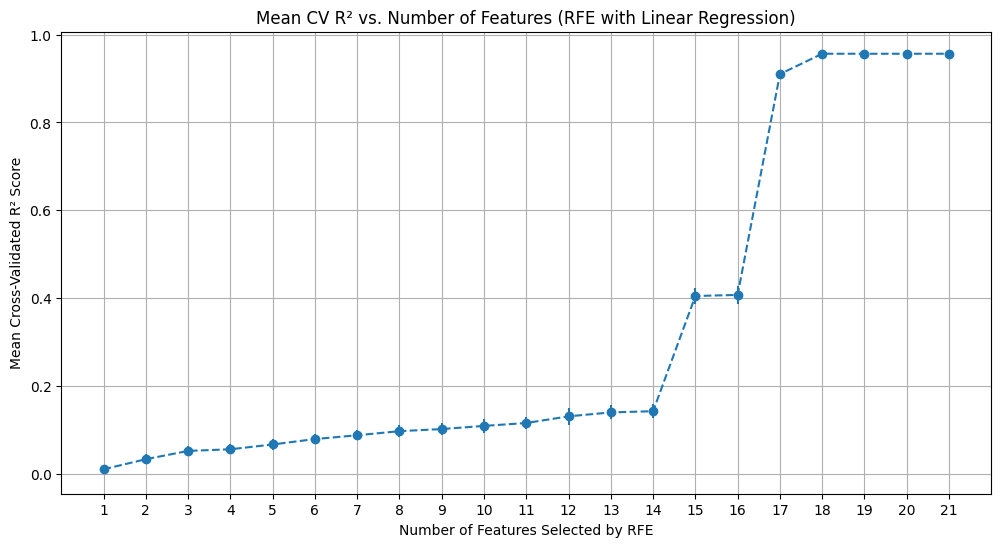


Optimal number of features based on maximum mean CV R²: 21

Selected features based on optimal number:
['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Parental_Involvement_Low', 'Parental_Involvement_Medium', 'Access_to_Resources_Low', 'Access_to_Resources_Medium', 'Extracurricular_Activities_Yes', 'Motivation_Level_Low', 'Motivation_Level_Medium', 'Internet_Access_Yes', 'Family_Income_Low', 'Family_Income_Medium', 'School_Type_Public', 'Peer_Influence_Neutral', 'Peer_Influence_Positive', 'Learning_Disabilities_Yes', 'Gender_Male']

--- Final Model Evaluation (with optimal RFE features) ---
MSE: 0.46
RMSE: 0.68
MAE: 0.54
R²: 0.95

Optimal model pipeline saved as 'optimal_rfe_lrmodel_pipeline.pkl'
Selected feature names saved as 'optimal_rfe_selected_features.pkl'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.model_selection import RepeatedKFold

# Define the model
model_rfe = LinearRegression()

# Define RFE
# Start with the total number of features and iterate down
min_features_to_select = 1  # Minimum number of features to consider
n_features = X_train.shape[1] # Total number of features

rfe_results = []

for k in range(min_features_to_select, n_features + 1):
    print(f"Evaluating RFE with {k} features...")
    rfe = RFE(estimator=model_rfe, n_features_to_select=k)

    # Create a pipeline including scaling and RFE
    pipeline_rfe_lr = Pipeline([
        ('rfe', rfe),
        ('lr', LinearRegression()) # The model is part of the RFE step, but we still need the final LR step in the pipeline for prediction after RFE selects features
                                   # Note: RFE internally fits the estimator. This setup might be slightly redundant but works for evaluation.
                                   # A cleaner approach could be to apply RFE first, then fit the LR model separately on the reduced feature set.
                                   # However, using it in a pipeline simplifies cross-validation.
    ])


    # Evaluate using cross-validation
    # Use RepeatedKFold for more robust evaluation
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
    scores = cross_val_score(pipeline_rfe_lr, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)

    # Calculate average score
    mean_score = np.mean(scores)
    std_score = np.std(scores)

    rfe_results.append({
        'Num_Features': k,
        'Mean_CV_R2': mean_score,
        'Std_CV_R2': std_score
    })
    print(f"  Mean CV R2: {mean_score:.4f}, Std CV R2: {std_score:.4f}")


# Convert results to DataFrame for easy viewing and analysis
rfe_results_df = pd.DataFrame(rfe_results)
print("\nRFE Results Summary:")
print(rfe_results_df)

# Plot the results
plt.figure(figsize=(12, 6))
plt.errorbar(rfe_results_df['Num_Features'], rfe_results_df['Mean_CV_R2'], yerr=rfe_results_df['Std_CV_R2'], marker='o', linestyle='--')
plt.title('Mean CV R² vs. Number of Features (RFE with Linear Regression)')
plt.xlabel('Number of Features Selected by RFE')
plt.ylabel('Mean Cross-Validated R² Score')
plt.grid(True)
plt.xticks(rfe_results_df['Num_Features'])
plt.show()

# Find the number of features that gives the maximum mean R² score
best_num_features = rfe_results_df.loc[rfe_results_df['Mean_CV_R2'].idxmax(), 'Num_Features']
print(f"\nOptimal number of features based on maximum mean CV R²: {best_num_features}")

# Now, let's select the features using the optimal number found
final_rfe = RFE(estimator=model_rfe, n_features_to_select=best_num_features)
final_rfe.fit(X_train, y_train)

# Get the selected feature indices and names
selected_feature_indices = final_rfe.get_support(indices=True)
selected_feature_names = X_train.columns[selected_feature_indices]

print("\nSelected features based on optimal number:")
print(selected_feature_names.tolist())

# Train the final model with the selected features
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# Train the pipeline with scaling and Linear Regression on the selected features
final_pipeline_lr = Pipeline([
    ('lr', LinearRegression())
])

final_pipeline_lr.fit(X_train_selected, y_train)

# Evaluate the final model
y_pred_final = final_pipeline_lr.predict(X_test_selected)
final_mse = mean_squared_error(y_test, y_pred_final)
final_rmse = np.sqrt(final_mse)
final_mae = mean_absolute_error(y_test, y_pred_final)
final_r2 = r2_score(y_test, y_pred_final)

print("\n--- Final Model Evaluation (with optimal RFE features) ---")
print(f"MSE: {final_mse:.2f}")
print(f"RMSE: {final_rmse:.2f}")
print(f"MAE: {final_mae:.2f}")
print(f"R²: {final_r2:.2f}")

# Save the final model pipeline with the selected features information
# You can save the final pipeline directly. When loaded, it will expect inputs with the selected features.
# It's good practice to also save the list of selected feature names.
joblib.dump(final_pipeline_lr, 'optimal_rfe_lrmodel_pipeline.pkl')
joblib.dump(selected_feature_names.tolist(), 'optimal_rfe_selected_features.pkl')

print("\nOptimal model pipeline saved as 'optimal_rfe_lrmodel_pipeline.pkl'")
print("Selected feature names saved as 'optimal_rfe_selected_features.pkl'")

# --- How to use the saved model for prediction ---

# # Load the saved model pipeline and selected features
# try:
#     loaded_optimal_pipeline = joblib.load('optimal_rfe_lrmodel_pipeline.pkl')
#     loaded_selected_features = joblib.load('optimal_rfe_selected_features.pkl')
#     print("\nOptimal model and selected features loaded successfully.")
# except FileNotFoundError:
#     print("Error: Model or feature list file not found.")
# except Exception as e:
#     print(f"An error occurred while loading the model: {e}")

# # Example prediction using the loaded model (assuming you have new data `new_data_df`)
# # new_data_df should be a pandas DataFrame with the same columns as the original training data (before RFE)
# # You need to select only the features the model was trained on
# if 'loaded_optimal_pipeline' in locals() and 'loaded_selected_features' in locals():
#     # Assume new_data_df is your new data in a pandas DataFrame
#     # Make sure new_data_df has all the original columns or can be transformed to match them
#     # Select only the features required by the model
#     # For example, if new_data_raw is your raw new data DataFrame:
#     # new_data_processed = ... # Perform the same preprocessing steps as training (e.g., one-hot encoding, outlier handling if applicable)
#     # new_data_for_prediction = new_data_processed[loaded_selected_features]

#     # # Make prediction
#     # predictions_new = loaded_optimal_pipeline.predict(new_data_for_prediction)
#     # print("\nPredictions on new data:")
#     # print(predictions_new)



In [ ]:
evaluate_model(pipeline_svr, X_train, y_train, X_test, y_test, "SVR")

SVR - MSE: 0.61, RMSE: 0.78, MAE: 0.63, R²: 0.94
SVR - CV R² scores: [0.93467255 0.94468185 0.93284364 0.93665324 0.94158456]
SVR - R² score (CV mean): 0.9380871675053626
--------------------------------------------------


In [ ]:
evaluate_model(pipeline_rf, X_train, y_train, X_test, y_test, "Random Forest Regressor")

Random Forest Regressor - MSE: 1.52, RMSE: 1.23, MAE: 0.97, R²: 0.85
Random Forest Regressor - CV R² scores: [0.86294804 0.86668366 0.85312353 0.87473953 0.87142563]
Random Forest Regressor - R² score (CV mean): 0.865784076755115
--------------------------------------------------


In [ ]:
evaluate_model(pipeline_xgb, X_train, y_train, X_test, y_test, "XGBoost Regressor")

XGBoost Regressor - MSE: 0.84, RMSE: 0.92, MAE: 0.73, R²: 0.92
XGBoost Regressor - CV R² scores: [0.91558141 0.92614746 0.91312391 0.91982752 0.92758191]
XGBoost Regressor - R² score (CV mean): 0.9204524397850037
--------------------------------------------------


In [ ]:
results_df = pd.DataFrame(results)
print("\nTabel Ringkasan Evaluasi Model:")
results_df


Tabel Ringkasan Evaluasi Model:


,Model,Test MSE,Test RMSE,Test MAE,Test R²,CV R² Mean,CV R² Std
0,Linear Regression,0.458976,0.677478,0.542204,0.954238,0.956353,0.002427
1,SVR,0.614026,0.783598,0.625233,0.938779,0.938087,0.004403
2,Random Forest Regressor,1.520814,1.233213,0.971495,0.848369,0.865784,0.007499
3,XGBoost Regressor,0.844301,0.918858,0.731162,0.915820,0.920452,0.005676


**Penjelasan kode:**

Mengonversi list results yang berisi hasil evaluasi dari semua model menjadi tabel ringkasan (DataFrame).

Tabel ini memudahkan perbandingan antar model berdasarkan metrik-metrik evaluasi utama.



# Optimasi Model Menggunakan RandomSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

rf_param_dist = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

rf_search = RandomizedSearchCV(
    rf_pipeline, rf_param_dist,
    n_iter=20, cv=5, scoring='r2',
    random_state=42, n_jobs=-1
)

rf_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__max_depth': [None, 10, 20, 30],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [100, 200, 300]},
                   random_state=42, scoring='r2')

In [ ]:
best_model = rf_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')

rf_result = {
    'Model': 'Random Forest Regressor (Tuning)',
    'Test MSE': mse,
    'Test RMSE': rmse,
    'Test MAE': mae,
    'Test R²': r2,
    'CV R² Mean': np.mean(cv_scores),
    'CV R² Std': np.std(cv_scores),
    'Best Params': rf_search.best_params_
}

In [ ]:
rf_result

{'Model': 'Random Forest Regressor (Tuning)',
 'Test MSE': 1.5021183548214245,
 'Test RMSE': np.float64(1.2256093810106974),
 'Test MAE': 0.9661371332585204,
 'Test R²': 0.8502332406474257,
 'CV R² Mean': np.float64(0.8673886486207214),
 'CV R² Std': np.float64(0.007188487453746131),
 'Best Params': {'model__n_estimators': 300,
  'model__min_samples_split': 2,
  'model__min_samples_leaf': 1,
  'model__max_depth': 20}}

In [ ]:
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', xgb.XGBRegressor(random_state=42, objective='reg:squarederror'))
])

xgb_param_dist = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 6, 10],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.6, 0.8, 1.0]
}

xgb_search = RandomizedSearchCV(
    xgb_pipeline, xgb_param_dist,
    n_iter=20, cv=5, scoring='r2',
    random_state=42, n_jobs=-1
)

xgb_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=None,
                                                           grow_policy=None,
                                                           importance_...
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=42, ...))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.01, 0.1,
                                                                 0.2],
                                        'model__max_depth': [3, 6, 10],
                                        'model__n_estimators': [100, 200, 300],
                                        'model__subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='r2')

In [ ]:
best_model = xgb_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')

xgb_result = {
    'Model': 'XGBoost Regressor (Tuning)',
    'Test MSE': mse,
    'Test RMSE': rmse,
    'Test MAE': mae,
    'Test R²': r2,
    'CV R² Mean': np.mean(cv_scores),
    'CV R² Std': np.std(cv_scores),
    'Best Params': xgb_search.best_params_
}

- Menyimpan model terbaik hasil pencarian.
- Prediksi terhadap data uji dengan model terbaik.
- Menghitung metrik evaluasi model:
  - **MSE**: Mean Squared Error
  - **RMSE**: Root Mean Squared Error
  - **MAE**: Mean Absolute Error
  - **R²**: Koefisien determinasi
  - **CV R²**: Hasil rata-rata dan standar deviasi dari cross-validation

In [ ]:
xgb_result

{'Model': 'XGBoost Regressor (Tuning)',
 'Test MSE': 0.5662937760353088,
 'Test RMSE': np.float64(0.7525249338296431),
 'Test MAE': 0.6004243493080139,
 'Test R²': 0.9435384273529053,
 'CV R² Mean': np.float64(0.9478462100028991),
 'CV R² Std': np.float64(0.003827021207079289),
 'Best Params': {'model__subsample': 0.6,
  'model__n_estimators': 300,
  'model__max_depth': 3,
  'model__learning_rate': 0.1}}

In [ ]:
pipeline_svr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR())
])
param_distributions_svr = {
    'model__C': np.logspace(-2, 2, 50),
    'model__epsilon': np.linspace(0.01, 1.0, 50),
    'model__kernel': ['rbf', 'linear']
}

random_search_svr = RandomizedSearchCV(
    pipeline_svr, param_distributions=param_distributions_svr,
    n_iter=20, scoring='r2', cv=5, random_state=42, n_jobs=-1
)
random_search_svr.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model', SVR())]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__C': array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02,...
       0.41408163, 0.43428571, 0.4544898 , 0.47469388, 0.49489796,
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.59591837,
       0.61612245, 0.63632653, 0.65653061, 0.67673469, 0.69693878,
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.93938776, 0.95959184, 0.97979592, 1.        ]),
                                        'model__kernel': ['rbf', 'linear']},
                   random_state=42, scoring='r2')

In [ ]:
best_model = random_search_svr.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')

svr_result = {
    'Model': 'SVR (Tuning)',
    'Test MSE': mse,
    'Test RMSE': rmse,
    'Test MAE': mae,
    'Test R²': r2,
    'CV R² Mean': np.mean(cv_scores),
    'CV R² Std': np.std(cv_scores),
    'Best Params': random_search_svr.best_params_
}

- Menyimpan model terbaik hasil pencarian.
- Prediksi terhadap data uji dengan model terbaik.
- Menghitung metrik evaluasi model:
  - **MSE**: Mean Squared Error
  - **RMSE**: Root Mean Squared Error
  - **MAE**: Mean Absolute Error
  - **R²**: Koefisien determinasi
  - **CV R²**: Hasil rata-rata dan standar deviasi dari cross-validation

In [ ]:
svr_result

{'Model': 'SVR (Tuning)',
 'Test MSE': 0.4575922390490503,
 'Test RMSE': np.float64(0.6764556445540612),
 'Test MAE': 0.5412095378405423,
 'Test R²': 0.9543763602067082,
 'CV R² Mean': np.float64(0.9563145688587322),
 'CV R² Std': np.float64(0.002453380921277585),
 'Best Params': {'model__kernel': 'linear',
  'model__epsilon': np.float64(0.4342857142857143),
  'model__C': np.float64(82.86427728546842)}}

In [ ]:
all_results = [
    svr_result,         # SVR Tuning
    rf_result,          # Random Forest Tuning
    xgb_result          # XGBoost Tuning
]
resultstuning_df = pd.DataFrame(all_results)
resultstuning_df

,Model,Test MSE,Test RMSE,Test MAE,Test R²,CV R² Mean,CV R² Std,Best Params
0,SVR (Tuning),0.457592,0.676456,0.541210,0.954376,0.956315,0.002453,"{'model__kernel': 'linear', 'model__epsilon': ..."
1,Random Forest Regressor (Tuning),1.502118,1.225609,0.966137,0.850233,0.867389,0.007188,"{'model__n_estimators': 300, 'model__min_sampl..."
2,XGBoost Regressor (Tuning),0.566294,0.752525,0.600424,0.943538,0.947846,0.003827,"{'model__subsample': 0.6, 'model__n_estimators..."


Menggabungkan semua hasil tuning ke dalam satu DataFrame untuk perbandingan dan visualisasi performa model-model yang telah dioptimasi.

# **Hasil Akhir Model**

In [ ]:
if 'Best Params' not in results_df.columns:
    results_df['Best Params'] = np.nan

resultfinal_df = pd.concat([results_df, resultstuning_df], ignore_index=True)
resultfinal_df = resultfinal_df.sort_values(by='Test R²', ascending=False).reset_index(drop=True)

print("\nTabel Ringkasan Evaluasi Model dengan hasil terbaik:")
resultfinal_df.head(10)


Tabel Ringkasan Evaluasi Model dengan hasil terbaik:


,Model,Test MSE,Test RMSE,Test MAE,Test R²,CV R² Mean,CV R² Std,Best Params
0,SVR (Tuning),0.457592,0.676456,0.541210,0.954376,0.956315,0.002453,"{'model__kernel': 'linear', 'model__epsilon': ..."
1,Linear Regression,0.458976,0.677478,0.542204,0.954238,0.956353,0.002427,NaN
2,XGBoost Regressor (Tuning),0.566294,0.752525,0.600424,0.943538,0.947846,0.003827,"{'model__subsample': 0.6, 'model__n_estimators..."
3,SVR,0.614026,0.783598,0.625233,0.938779,0.938087,0.004403,NaN
4,XGBoost Regressor,0.844301,0.918858,0.731162,0.915820,0.920452,0.005676,NaN
5,Random Forest Regressor (Tuning),1.502118,1.225609,0.966137,0.850233,0.867389,0.007188,"{'model__n_estimators': 300, 'model__min_sampl..."
6,Random Forest Regressor,1.520814,1.233213,0.971495,0.848369,0.865784,0.007499,NaN


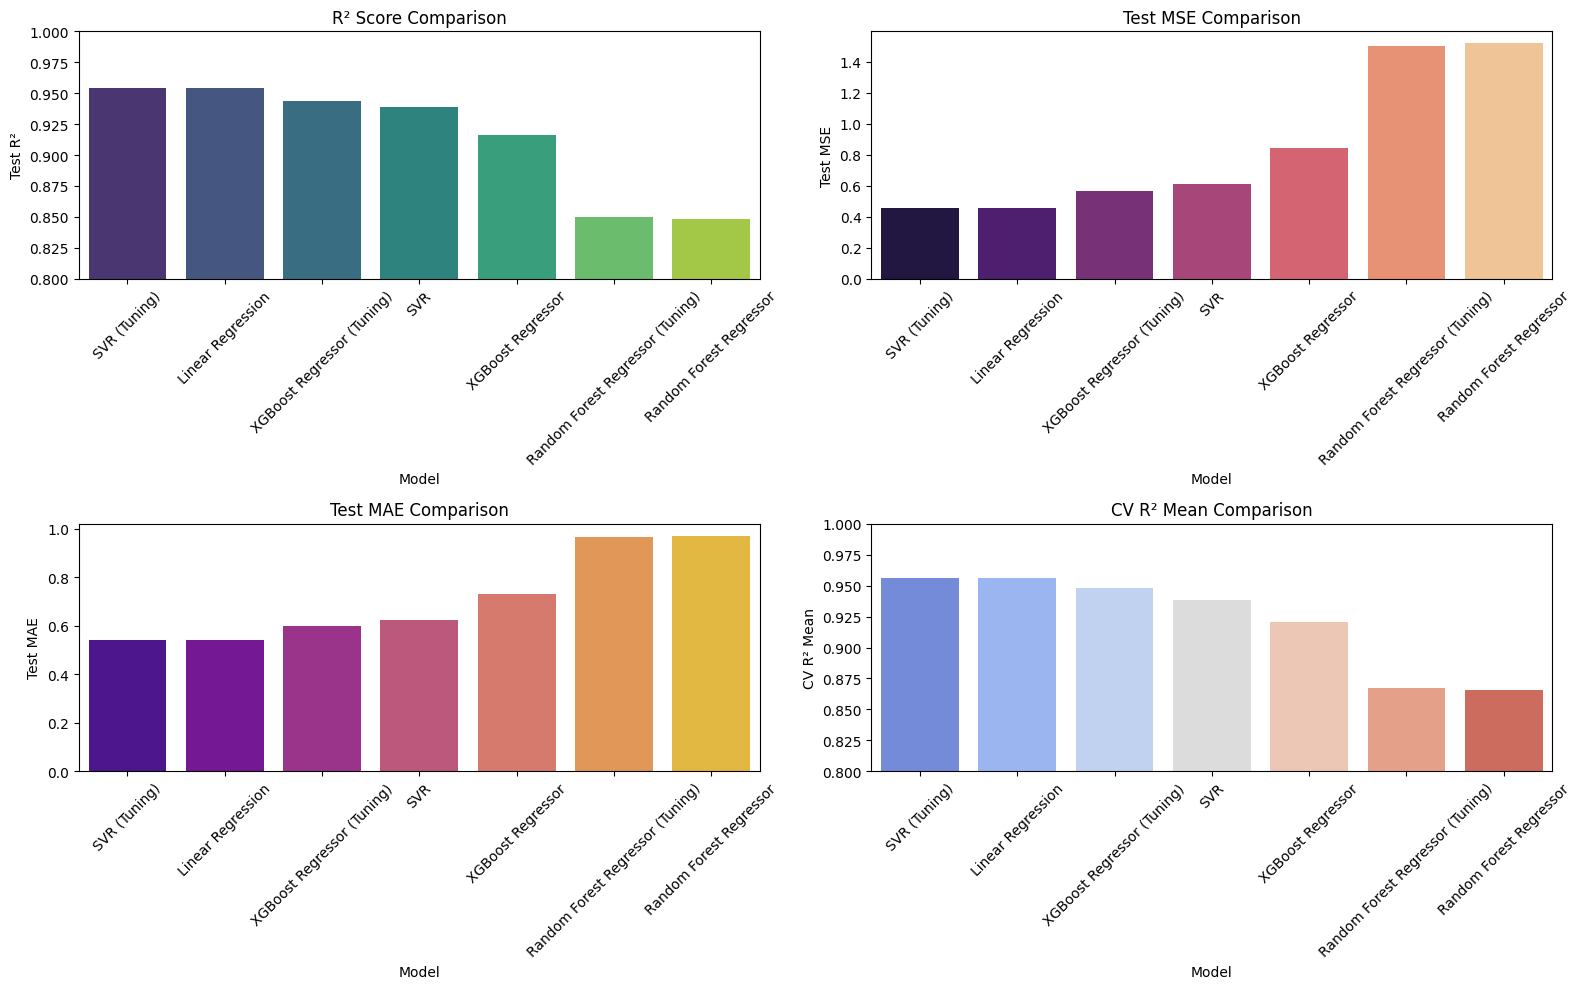

In [ ]:
plt.figure(figsize=(16, 10))

# Plotting R² Score
plt.subplot(2, 2, 1)
sns.barplot(data=resultfinal_df, x="Model", y="Test R²", palette="viridis")
plt.title("R² Score Comparison")
plt.xticks(rotation=45)
plt.ylim(0.8, 1)

# Plotting MSE
plt.subplot(2, 2, 2)
sns.barplot(data=resultfinal_df, x="Model", y="Test MSE", palette="magma")
plt.title("Test MSE Comparison")
plt.xticks(rotation=45)

# Plotting MAE
plt.subplot(2, 2, 3)
sns.barplot(data=resultfinal_df, x="Model", y="Test MAE", palette="plasma")
plt.title("Test MAE Comparison")
plt.xticks(rotation=45)

# Plotting CV R² Mean
plt.subplot(2, 2, 4)
sns.barplot(data=resultfinal_df, x="Model", y="CV R² Mean", palette="coolwarm")
plt.title("CV R² Mean Comparison")
plt.xticks(rotation=45)
plt.ylim(0.8, 1)

plt.tight_layout()
plt.show()

# **Top Atribut Terbaik**

Top 10 fitur paling berpengaruh (positif):
Peer_Influence_Positive           0.997099
Internet_Access_Yes               0.982517
Extracurricular_Activities_Yes    0.528639
Peer_Influence_Neutral            0.506104
Tutoring_Sessions                 0.504917
Hours_Studied                     0.295796
Physical_Activity                 0.222551
Attendance                        0.201028
Previous_Scores                   0.048699
Sleep_Hours                       0.015456
dtype: float64

Top 10 fitur paling berpengaruh (negatif):
School_Type_Public            -0.021165
Family_Income_Medium          -0.442038
Motivation_Level_Medium       -0.492928
Family_Income_Low             -0.940179
Access_to_Resources_Medium    -0.958566
Learning_Disabilities_Yes     -0.972452
Motivation_Level_Low          -0.982323
Parental_Involvement_Medium   -0.994218
Parental_Involvement_Low      -1.969996
Access_to_Resources_Low       -1.979418
dtype: float64


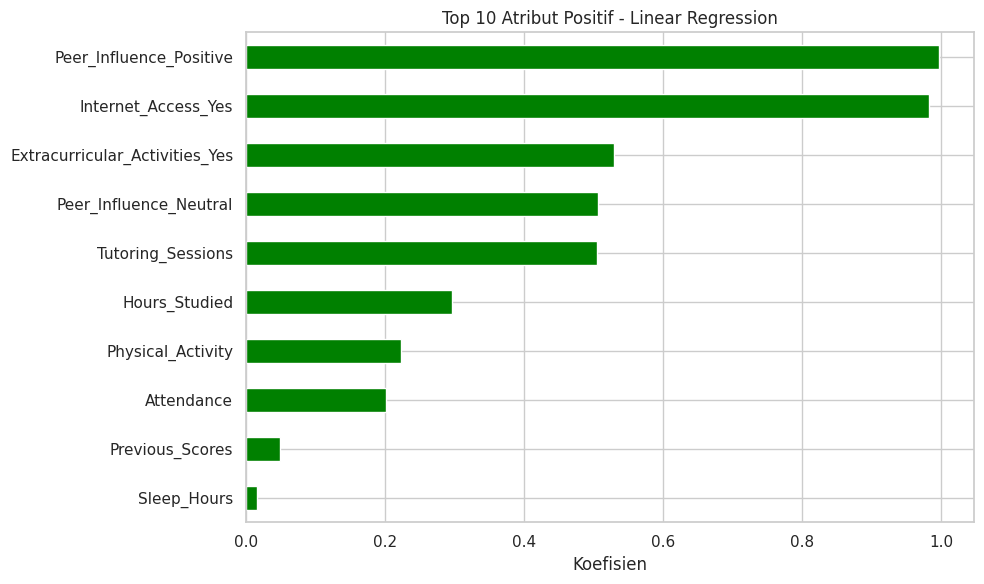

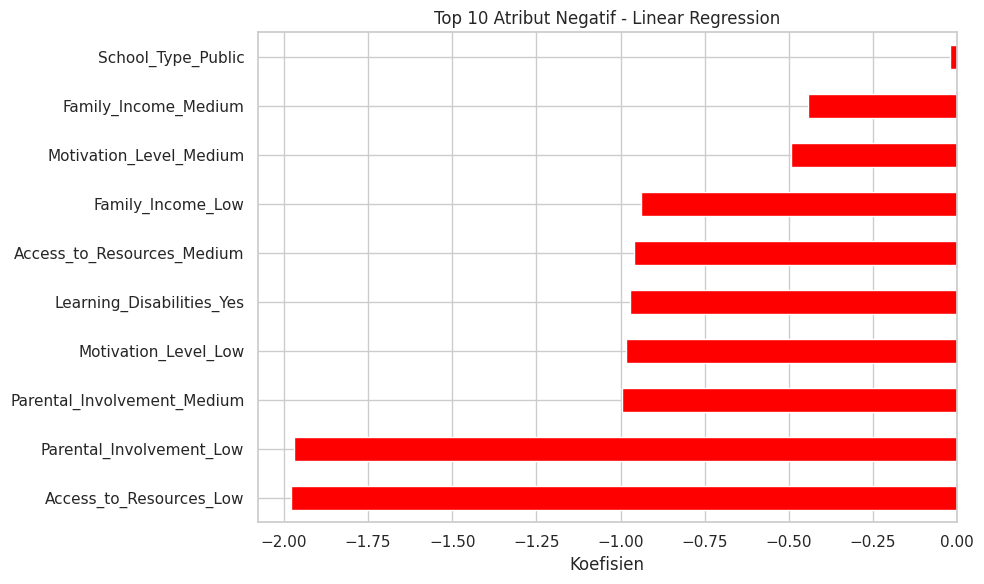

In [ ]:
top_lr = LinearRegression()
top_lr.fit(X_train, y_train)

coef_series = pd.Series(top_lr.coef_, index=X.columns).sort_values(ascending=False)

# Tampilkan top 10 fitur yang paling berpengaruh
print("Top 10 fitur paling berpengaruh (positif):")
print(coef_series.head(10))

print("\nTop 10 fitur paling berpengaruh (negatif):")
print(coef_series.tail(10))

# Visualisasi
plt.figure(figsize=(10,6))
coef_series.head(10).plot(kind='barh', color='green', label='Positif')
plt.title('Top 10 Atribut Positif - Linear Regression')
plt.xlabel('Koefisien')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
coef_series.tail(10).plot(kind='barh', color='red', label='Negatif')
plt.title('Top 10 Atribut Negatif - Linear Regression')
plt.xlabel('Koefisien')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

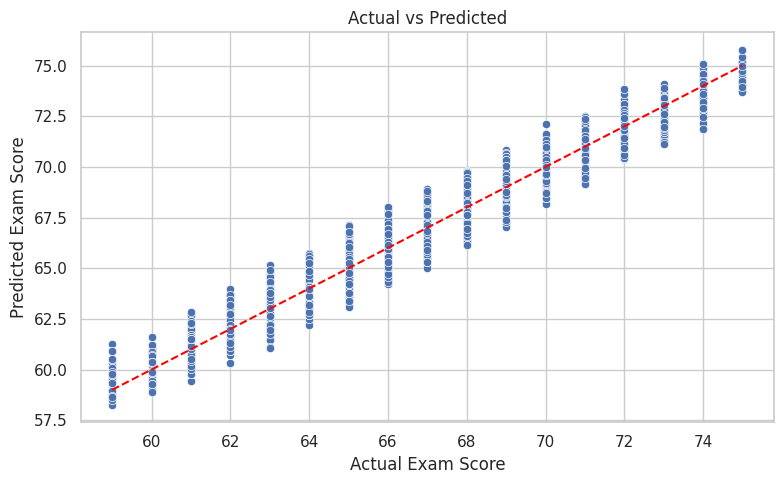

,feature,VIF
1,Attendance,32.791272
3,Previous_Scores,23.175367
2,Sleep_Hours,20.386686
0,Hours_Studied,12.116144
13,Internet_Access_Yes,12.088631
5,Physical_Activity,8.773818
12,Motivation_Level_Medium,3.489884
16,School_Type_Public,3.256304
15,Family_Income_Medium,3.097746
14,Family_Income_Low,3.079835


In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

y_pred = top_lr.predict(X)

# Plot 2: Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted")
plt.tight_layout()
plt.show()

# Plot 5: VIF (Multikolinearitas)
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df_sorted = vif_df.sort_values(by="VIF", ascending=False)

vif_df_sorted.head(10)  # Tampilkan 10 fitur dengan VIF tertinggi

### **Penjelasan Umum**:
- **Sumbu X**: Nilai ujian sebenarnya (Actual Exam Score)
- **Sumbu Y**: Nilai ujian hasil prediksi dari model regresi (Predicted Exam Score)
- Titik-titik biru: Pasangan (nilai sebenarnya, nilai prediksi) dari data
- Garis merah putus-putus: Garis regresi ideal (garis identitas, yaitu \( y = x \))

---

## 🔍 **Analisis Visual:**

### ✅ **1. Pola linier yang kuat**
- Titik-titik tersebar mengikuti **pola diagonal naik** dari kiri bawah ke kanan atas.
- Artinya, **model cukup konsisten dalam mengikuti arah tren data sebenarnya**.
- Linear Regression cocok digunakan di sini karena hubungan antara fitur dan target memang tampak linier.

### ✅ **2. Titik dekat dengan garis identitas**
- Sebagian besar titik berada **dekat dengan garis merah** (ideal).
- Ini menunjukkan bahwa **prediksi cukup akurat** dan error-nya tidak terlalu besar.

### ⚠️ **3. Sedikit underestimation dan overestimation**
- Di bagian ujung kanan (nilai ujian tinggi), model kadang **underpredict** (prediksi lebih rendah dari aktual).
- Di bagian ujung kiri (nilai rendah), kadang **overpredict** (prediksi sedikit lebih tinggi).
- Ini umum dalam Linear Regression jika data outlier atau distribusinya tidak normal.

### ✅ **4. Tidak ada pola residual yang jelas**
- Penyebaran titik-titik tidak membentuk pola tertentu (misalnya kurva atau cluster aneh).
- Ini tanda bahwa **model tidak bias secara sistematis** terhadap rentang nilai tertentu.

---

## 📊 **Kesimpulan Grafik**:

| Aspek | Analisis |
|-------|----------|
| 🎯 Akurasi visual | Model Linear Regression mampu memetakan nilai prediksi cukup akurat terhadap nilai aktual. |
| 📉 Error | Error model relatif kecil, tersebar merata, dan tidak menunjukkan pola sistematik. |
| 📐 Kesesuaian model | Linear Regression adalah model sederhana namun cukup representatif untuk data ini. |
| 🔁 Implikasi | Cocok untuk baseline model atau untuk interpretasi dalam konteks penelitian tindakan kelas atau pengambilan keputusan berbasis data. |

## **Tindak Lanjut**

## 🔍 **Analisis VIF (Variance Inflation Factor)**

### 📌 **Apa itu VIF?**
- VIF mengukur **seberapa besar korelasi antara sebuah variabel independen dengan variabel independen lainnya** dalam model regresi.
- Jika VIF terlalu tinggi, artinya fitur tersebut memiliki **korelasi tinggi dengan fitur lain**, dan ini bisa **membingungkan model** dalam membedakan efek masing-masing variabel.

---

### 📊 **Interpretasi Nilai VIF:**

| Nilai VIF | Interpretasi |
|-----------|-------------|
| < 5       | Tidak ada multikolinearitas yang mengkhawatirkan ✅ |
| 5 – 10    | Cukup tinggi, sebaiknya dicek korelasinya ⚠️ |
| > 10      | Multikolinearitas sangat tinggi, perlu segera ditangani ❗ |

---

### 🧠 **Analisis Berdasarkan Tabel VIF:**

| Feature                  | VIF       | Catatan |
|--------------------------|-----------|---------|
| Attendance               | 32.79     | ⚠️ Sangat tinggi, kemungkinan besar sangat berkorelasi dengan fitur seperti “Hours Studied” atau “Previous Scores” |
| Previous_Scores          | 23.17     | ⚠️ Tinggi, kemungkinan berkaitan dengan “Tutoring”, “Attendance”, dll |
| Sleep_Hours              | 20.39     | ⚠️ Tinggi, bisa jadi korelasi dengan “Physical Activity” atau “Hours Studied” |
| Hours_Studied            | 12.12     | ⚠️ Perlu perhatian, mungkin overlap dengan variabel lain seperti Attendance atau Tutoring |
| Internet_Access_Yes      | 12.09     | ⚠️ Cukup tinggi — mungkin berkorelasi dengan keterlibatan kegiatan akademik atau akses belajar |
| Physical_Activity        | 8.77      | ⚠️ Tidak terlalu ekstrem, tapi tetap patut diperhatikan |
| Motivation_Level_Medium | 3.49      | ✅ Aman |
| School_Type_Public       | 3.26      | ✅ Aman |
| Family_Income_Medium     | 3.10      | ✅ Aman |
| Family_Income_Low        | 3.08      | ✅ Aman |

---

## 🔁 **Rekomendasi Tindakan:**

1. **Reduksi Multikolinearitas (Opsional):**
   - Coba **hilangkan salah satu dari variabel yang memiliki VIF > 10**, seperti `Attendance`, `Previous_Scores`, atau `Sleep_Hours`.
   - Bisa juga menggunakan **Principal Component Analysis (PCA)** jika tetap ingin mempertahankan semua fitur namun menghindari multikolinearitas.

2. **Analisis Korelasi:**
   - Lihat **korelasi pairwise** antar fitur (pakai `.corr()` + heatmap) agar tahu mana fitur yang saling overlap secara informasi.

3. **Regularisasi Model:**
   - Kalau kamu tetap ingin mempertahankan semua fitur, pertimbangkan menggunakan **Ridge Regression** atau **Lasso** untuk mengurangi efek multikolinearitas pada koefisien.

---

### 📝 **Kesimpulan**:

- **Multikolinearitas terdeteksi** pada beberapa fitur, terutama `Attendance`, `Previous_Scores`, `Sleep_Hours`, dan `Internet_Access_Yes`.
- Sebaiknya lakukan seleksi fitur lebih lanjut atau gunakan teknik regularisasi.